In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [117]:
### Leer dataset

data = pd.read_csv('data_regression.csv')
data

,Unnamed: 0,X1,X2,X3,y
0,0,-10.000000,0.000000,-5.000000,10.958481
1,1,-9.986658,0.014676,-4.996664,8.991666
2,2,-9.973316,0.029353,-4.993329,10.398068
3,3,-9.959973,0.044029,-4.989993,11.759961
4,4,-9.946631,0.058706,-4.986658,10.177304
...,...,...,...,...,...
1495,1495,9.946631,21.941294,-0.013342,1.208277
1496,1496,9.959973,21.955971,-0.010007,1.814573
1497,1497,9.973316,21.970647,-0.006671,0.791170
1498,1498,9.986658,21.985324,-0.003336,1.207057


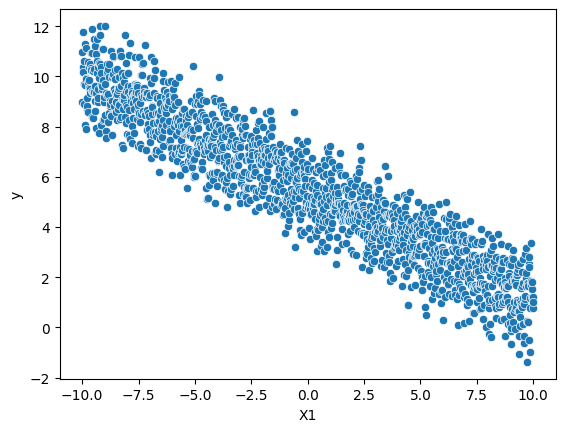

In [118]:
### Gráfico de dispersión

sns.scatterplot(  
    data = data,        # DataFrame containing the data
    x = 'X1',           # Variable for the x-axis
    y = 'y'             # Variable for the y-axis
    )            
plt.show()

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is a DataFrame with multiple x variables: X1, X2, X3
# and a common y variable: 'y'

# Melt the DataFrame to create a long-form representation
melted_data = pd.melt(data, id_vars='y',
                      value_vars=['X1', 'X2', 'X3'],
                      var_name='X_variable',
                      value_name='X_value')


melted_data





,y,X_variable,X_value
0,10.958481,X1,-10.000000
1,8.991666,X1,-9.986658
2,10.398068,X1,-9.973316
3,11.759961,X1,-9.959973
4,10.177304,X1,-9.946631
...,...,...,...
4495,1.208277,X3,-0.013342
4496,1.814573,X3,-0.010007
4497,0.791170,X3,-0.006671
4498,1.207057,X3,-0.003336


In [120]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model. This line creates an instance of the LinearRegression class
modelo_rls = LinearRegression()

# Fit the model to the data
modelo_rls.fit(data[['X1']], data[['y']])   # The first argument (data[['X1']]) is a 2D array, the feature or independent variable.
                                            # The second argument (data[['y']]) is a 2D array, the target or dependent variable.

# Print coefficients and intercept
print('Coeficientes:', modelo_rls.coef_)
print('Intercepto:', modelo_rls.intercept_)

Coeficientes: [[-0.4478604]]
Intercepto: [5.48819523]


In [121]:
# Manual prediction using the learned coefficients and intercept

# Calculate predictions manually using the learned coefficients and intercept.
# This is done by applying the formula of a line: y = mx + b, where m is the coefficient and b is the intercept.

preds_manual = data['X1']*modelo_rls.coef_[0][0] + modelo_rls.intercept_[0] # Look previous result to see how coef_ and intercept_ are returned.


# Prediction using scikit-learn's predict function
# Use the predict method of the linear regression model to get predictions based on the input feature (data[['X1']]).

preds_sklearn = modelo_rls.predict(data[['X1']])


# These predictions (preds_manual and preds_sklearn) can be used to assess how well the model performs on the provided data.
# Comparing manually calculated predictions with those obtained # using scikit-learn's built-in predict function 
# helps ensure consistency and correctness in your implementation.

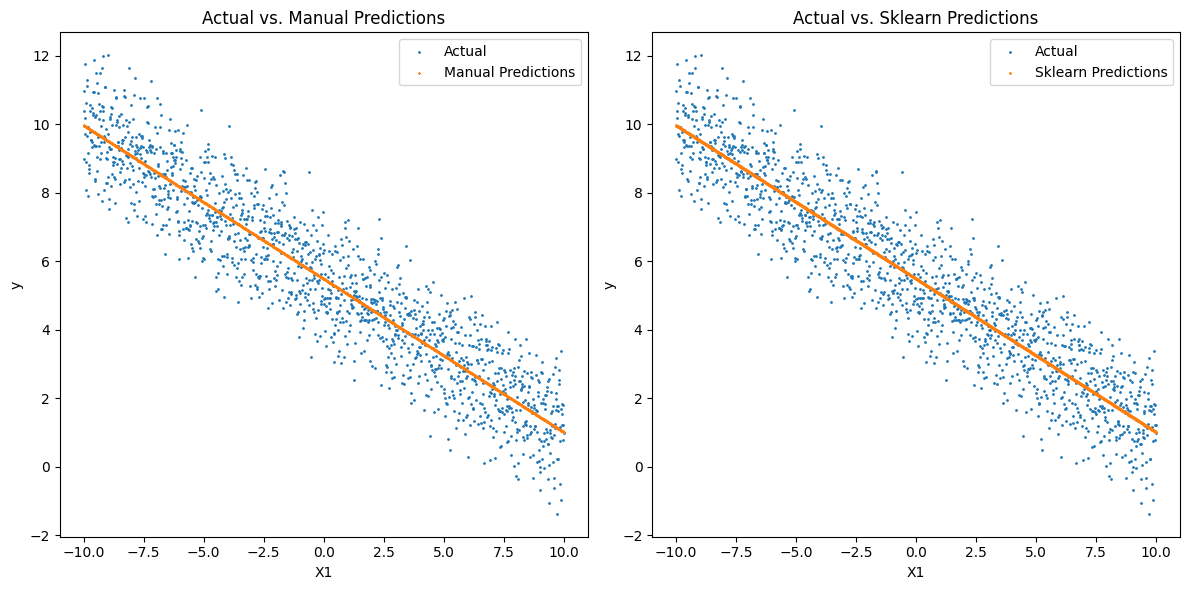

In [122]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. manual predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['X1'],
            data['y'],
            label='Actual',
            s=1)
plt.scatter(data['X1'],
            preds_manual,
            label='Manual Predictions',
            marker='x',
            s=1)
plt.title('Actual vs. Manual Predictions')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()

# Scatter plot of actual vs. sklearn predictions
plt.subplot(1, 2, 2)
plt.scatter(data['X1'],
            data['y'],
            label='Actual',
            s=1)
plt.scatter(data['X1'],
            preds_sklearn,
            label='Sklearn Predictions',
            marker='o',
            s=1)
plt.title('Actual vs. Sklearn Predictions')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [123]:
# Compare actual values with manual predictions and sklearn predictions
comparison_df = pd.DataFrame({
    'Actual': data['y'],
    'Manual Predictions': preds_manual,
    'Sklearn Predictions': preds_sklearn.ravel()
})

# Print the DataFrame to inspect differences
print(comparison_df)


         Actual  Manual Predictions  Sklearn Predictions
0     10.958481            9.966799             9.966799
1      8.991666            9.960824             9.960824
2     10.398068            9.954848             9.954848
3     11.759961            9.948873             9.948873
4     10.177304            9.942897             9.942897
...         ...                 ...                  ...
1495   1.208277            1.033493             1.033493
1496   1.814573            1.027518             1.027518
1497   0.791170            1.021542             1.021542
1498   1.207057            1.015567             1.015567
1499   0.993813            1.009591             1.009591

[1500 rows x 3 columns]


In [124]:
### Modelo de regresión múltiple

modelo = LinearRegression()
modelo.fit(data[['X1','X2','X3']], data[['y']])

LinearRegression()

In [125]:
print(modelo.coef_)
print(modelo.intercept_)

[[-0.19707828 -0.21678611 -0.04926957]]
[7.74966852]


In [126]:
preds = modelo.predict(data[['X1','X2','X3']])
preds.shape

(1500, 1)

<Axes: xlabel='X1', ylabel='y'>

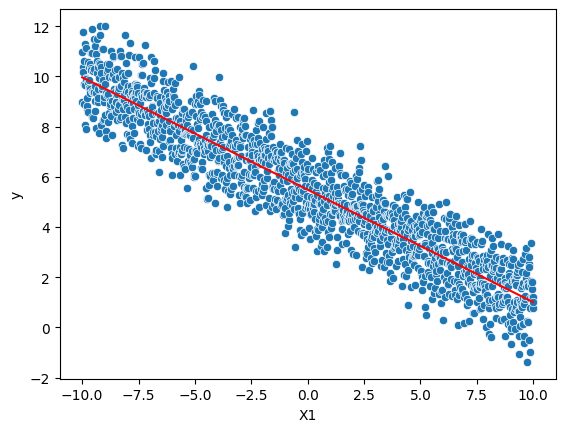

In [127]:
sns.scatterplot(data = data,
                x = 'X1',
                y = 'y')
sns.lineplot(x = data['X1'],
             y = preds[:,0], # Takes all values (":") from first colum ("0")
             color = 'red')

In [128]:
### Split de los datos

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['X1','X2','X3']],
                                                    data[['y']],
                                                    test_size = 0.2,    # 20% of data is dedicated test
                                                    random_state=123)

print(x_train.shape)
print(x_test.shape)

(1200, 3)
(300, 3)


In [129]:
### Entrenar modelos

modelo_rls = LinearRegression()
modelo_rlm = LinearRegression()

modelo_rls.fit(x_train[['X1']], y_train)
modelo_rlm.fit(x_train, y_train)


LinearRegression()

In [130]:
### Predicciones

preds_modelo_rls = modelo_rls.predict(x_test[['X1']])
preds_modelo_rlm = modelo_rlm.predict(x_test)

In [131]:
### Comparacion de Métricas

### Calculadas manualmente

mse_manual_rls = np.mean((y_test - preds_modelo_rls)**2)
mse_manual_rlm = np.mean((y_test - preds_modelo_rlm)**2)


print('MSE Regresión Lineal Simple:', mse_manual_rls)
print('MSE Regresión Lineal Múltiple:', mse_manual_rlm)



### Calculadas mediante la funcion interan de Sklearn

from sklearn.metrics import mean_squared_error

mse_rls = mean_squared_error(y_test, preds_modelo_rls)
mse_rlm = mean_squared_error(y_test, preds_modelo_rlm)

print(mse_rls)
print(mse_rlm)


MSE Regresión Lineal Simple: 1.0487934139779482
MSE Regresión Lineal Múltiple: 1.0483136092523138
1.0487934139779482
1.0483136092523138


## Data real

In [165]:
data = pd.read_csv('real_estate.csv')
data.tail()

,ID,address,price,neighbourhood,style,bedrooms,bathrooms,Levels,area,year,property_type
90,714601,673 avenue atwater,388,Ville marie,Divided Co-ownership,3,1,1.0,1235.0,1987,apartment
91,714757,1800 rene levesques W,399,Ville marie,Divided Co-ownership,2,2,1.0,887.0,2016,apartment
92,714752,603-90 prince,544,Ville marie,Divided Co-ownership,3,2,1.0,1101.0,2010,apartment
93,701400,1800 rene levesques W,548,Ville marie,Divided Co-ownership,2,2,1.0,1209.0,2016,apartment
94,716608,904-901 de la commune E,339,Ville marie,Open area,1,1,1.0,660.0,2013,apartment


In [176]:
x = data[['area',' bedrooms',' bathrooms']]
y = data[['price']]

# Atencion: los nombres de las columnas del dataset tienen un espacio delante
y

,price
0,263
1,650
2,1375
3,1470
4,224
...,...
90,388
91,399
92,544
93,548


In [174]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

## Entrenamiento

modelo_1 = LinearRegression()
modelo_1.fit(x_train[['area']], y_train)

modelo_2 = LinearRegression()
modelo_2.fit(x_train[[' bedrooms']], y_train)

modelo_3 = LinearRegression()
modelo_3.fit(x_train[['area',' bedrooms']], y_train)

modelo_4 = LinearRegression()
modelo_4.fit(x_train[['area',' bedrooms',' bathrooms']], y_train)

LinearRegression()

In [178]:
y_train

,price
41,339
65,489
23,363
64,259
56,2245
...,...
57,262
83,979
17,392
92,544


In [152]:
### R2

from sklearn.metrics import r2_score

preds_1 = modelo_1.predict(x_test[['area']])
preds_2 = modelo_2.predict(x_test[[' bedrooms']])
preds_3 = modelo_3.predict(x_test[['area',' bedrooms']])
preds_4 = modelo_4.predict(x_test[['area',' bedrooms',' bathrooms']])

mse_1 = mean_squared_error(y_test, preds_1)
mse_2 = mean_squared_error(y_test, preds_2)
mse_3 = mean_squared_error(y_test, preds_3)
mse_4 = mean_squared_error(y_test, preds_4)

r2_1 = r2_score(y_test, preds_1)
r2_2 = r2_score(y_test, preds_2)
r2_3 = r2_score(y_test, preds_3)
r2_4 = r2_score(y_test, preds_4)


print(mse_1)
print(mse_2)
print(mse_3)
print(mse_4)

print(r2_1)
print(r2_2)
print(r2_3)
print(r2_4)

22106.91009279085
37660.218829466845
30876.29498941077
34243.31861275735
-1.0437678287525691
-2.4816599581026875
-1.8544911118542222
-2.1657700075100066


In [ ]:
### Analizando el mejor modelo

print(modelo_1.coef_)
print(modelo_1.intercept_)

[[0.15110569]]
[331.96983368]


<Axes: xlabel='area', ylabel='price'>

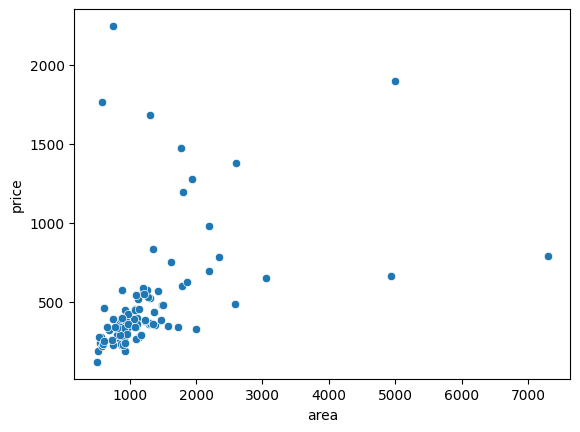

In [ ]:
sns.scatterplot(data = data, x = 'area', y = 'price')

In [ ]:
### Supuestos de la regresión lineal

## 1. Multicolinealidad
## 2. Homocedasticidad
## 3. Normalidad de los residuos


#### Evidentemente los modelos no predicen bien el precio de una casa solo con la interpretacion de la forma de la casa, lo que 
#### haremos ahora es incorporar el barrio y el estilo en su valoracion.

In [219]:
data

,ID,address,price,neighbourhood,style,bedrooms,bathrooms,Levels,area,year,property_type
0,710671,61605025 rue Pare,263,Cote-des-Neiges,Divided Co-ownership,2,1,8.0,854.65,2009,apartment
1,434822,4715 rue de la Peltrie,650,Cote-des-Neiges,Duplex,6,3,2.0,3049.75,1951,apartment
2,714903,4052 Avenue Oxford,1375,Cote-des-Neiges,Duplex,4,2,2.0,2600.00,1923,apartment
3,714678,2527 - 2529 chemin de la Cote-Sainte-Catherine,1470,Cote-des-Neiges,Duplex,9,4,2.0,1770.72,1930,apartment
4,696692,2017 Avenue de Hampton,224,Cote-des-Neiges,New Construction,2,1,1.0,865.00,2016,apartment
...,...,...,...,...,...,...,...,...,...,...,...
90,714601,673 avenue atwater,388,Ville marie,Divided Co-ownership,3,1,1.0,1235.00,1987,apartment
91,714757,1800 rene levesques W,399,Ville marie,Divided Co-ownership,2,2,1.0,887.00,2016,apartment
92,714752,603-90 prince,544,Ville marie,Divided Co-ownership,3,2,1.0,1101.00,2010,apartment
93,701400,1800 rene levesques W,548,Ville marie,Divided Co-ownership,2,2,1.0,1209.00,2016,apartment


In [221]:
# Separate features (X) and target variable (y)
X = data.drop(['price', 'ID'], axis=1)
y = data['price']

In [222]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the columns transformer for one-hot encoding
categorical_cols = ['neighbourhood', 'style', 'property_type'] # is a list containing the names of columns that are categorical and need one-hot encoding.
numeric_cols = ['area', ' bedrooms', ' bathrooms', 'year', 'area'] # is a list containing the names of numerical columns.

preprocessor = ColumnTransformer( #  is a class that allows you to selectively apply transformers to different subsets of the columns in your data.
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
# "transformers" is a list of tuples where each tuple contains:
#       A name for the transformation ('num' and 'cat' in this case).
#       The transformer to be applied.
#       The subset of columns to which the transformer should be applied.
# For numerical columns ('num'), the transformer is set to 'passthrough', which means those columns will be left unchanged.
# For categorical columns ('cat'), the transformer is set to OneHotEncoder(), which will perform one-hot encoding on those columns.


In [224]:
from sklearn.pipeline import Pipeline

# A pipeline is used to streamline a lot of routine processes,
# allowing you to specify a series of data transformations and a final estimator (model) in a single object

# Create a pipeline with preprocessing and linear regression

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# The first element of each tuple is a string identifier for the step,
# and the second element is the object that performs the transformation or modeling.


# When you later call model.fit(X_train, y_train), it will apply the preprocessing steps specified in 'preprocessor' to X_train,
# and then fit the linear regression model (LinearRegression()) to the transformed features.

# When you call model.predict(X_test), it will first transform X_test using the same preprocessing steps,
# and then use the linear regression model to make predictions on the transformed features.


In [225]:
# Fit the model
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate the model on the test set
score = model.score(X_test, y_test)


print(mean_squared_error(y_test, preds))
print(f'R-squared score on test set: {score:.4f}')

173909.33692673926
R-squared score on test set: -0.1524
